# Ensamblado de algoritmos

Es una técnica utilizada habitualmente en escenarios supervisados para mejorar el resultado de una predicción, combinando de alguna forma varios modelos. Los métodos más comunes son:

+ Boosting
+ Bootstrap aggregation (también llamado Bagging)
+ Bucket of models
+ Stacking.
+ Bayes optimal classifier
+ Bayesian parameter averaging
+ Bayesian model combination

# Bagging Classifier

Consiste en entrenar los diferentes modelos con subconjuntos del conjunto de entrenamiento, dando a cada resultado obtenido un voto con el mismo peso. Por defecto, las muestras escogidas para cada aprendiz son escogidas con reemplazo (lo que significa que una muestra dada puede ser escogida más de una vez en cada bloque de entrenamiento aleatorio). Si la selección se realiza sin reemplazo, el método se denomina pasting.

El ejemplo más clásico de bagging es Random Forest

Scikit-learn implementa esta funcionalidad en las clases sklearn.ensemble.BaggingRegressor y sklearn.ensemble.BaggingClassifier.

In [10]:
import pandas as pd

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

In [4]:
wine_dataset = load_wine()
X = pd.DataFrame(wine_dataset.data, columns = wine_dataset.feature_names)
y = wine_dataset.target
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
X.shape

(178, 13)

## Balanceo de las clases

Se revisa el balanceo de las clases, para ver si existe sesgo

In [42]:
pd.DataFrame(y, columns=['target']).groupby(by='target').size()

target
0    59
1    71
2    48
dtype: int64

## Separación de la data

80% se va a entrenamiento y 20% a prueba

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [47]:
print("# observaciones entrenamiento :", X_train.shape[0])
print("# observaciones test :", X_test.shape[0])

# observaciones entrenamiento : 142
# observaciones test : 36


In [63]:
x_modelo = DecisionTreeClassifier(max_depth = 3, random_state = 0, criterion='entropy')
cross_val_score(x_modelo, X_train, y_train, cv = 10).mean()

0.9085714285714287

In [64]:
x_modelo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

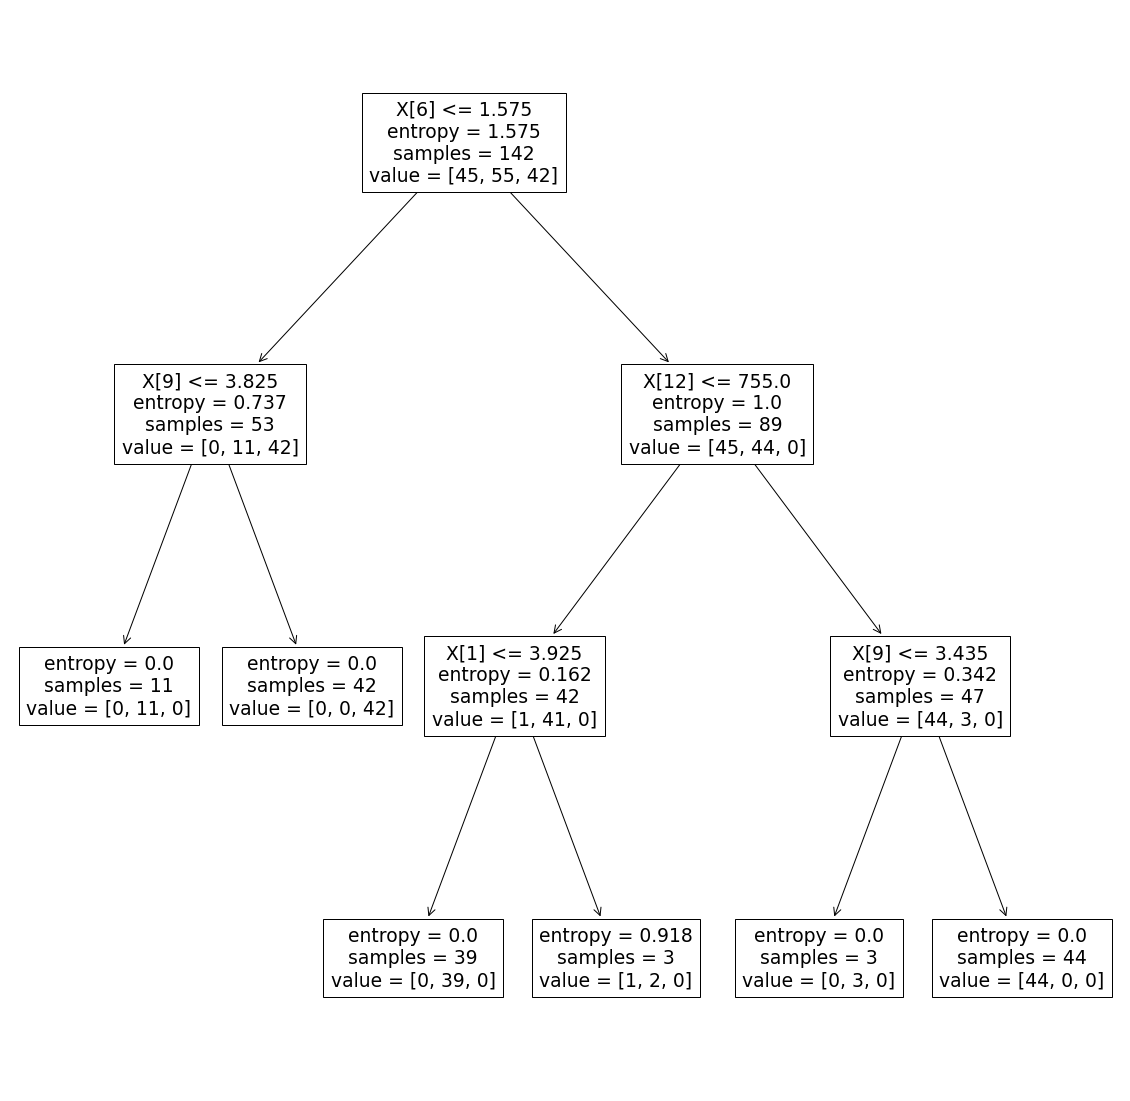

In [65]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(20,20))
_= tree.plot_tree(x_modelo) 

## Predicciones

In [66]:
y_pred = x_modelo.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0])

## Resultados de la clasificación

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



## Aplicación de BaggingClassifier

Se crea el clasificador bagging indicando el algoritmo en el que se basa y el número de éstos a considerar, y se estima la exactitud del mismo:

In [68]:
modelo = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 3, criterion='entropy'),
    n_estimators = 100,
    random_state = 0
)
cross_val_score(modelo, X_train, y_train, cv = 10).mean()

0.9580952380952381

## Mejorando el resultado ...

Este resultado puede ser mejorado haciendo uso de los parámetros ofrecidos por la clase DecisionTreeClassifier, por ejemplo, max_samples y max_features, que controlan el porcentaje de muestras y de características a considerar en cada uno de los aprendices a entrenar, respectivamente:

In [69]:
modelo = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 3, criterion='entropy'),
    n_estimators = 100,
    random_state = 0,
    max_samples = 0.7,
    max_features = 0.3
)
cross_val_score(modelo, X_train, y_train, cv = 10).mean()

0.9861904761904763

## Entrenamiento

Se entrena para luego realizar las predicciones

In [70]:
modelo.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


## Predicciones

Con el modelo entrenado se procede a predecir, usando la data de prueba

In [71]:
y_pred = modelo.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0])

## Evaluación del modelo

In [72]:
modelo.score(X_test, y_test)

0.9444444444444444

## Resultados de la clasificación

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 2 14  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.95      0.94      0.94        36





### Observación importante

La métrica accuracy (exactitud) no funciona bien cuando las clases están desbalanceadas. 

## Bonus track

Además del Bagging existe el concepto de boosting: se trata de una una familia de "meta-algoritmos" de ensamblado de aprendices capaces de convertir un conjunto de aprendices débiles en un aprendiz fuerte.

Normalmente suponen el entrenamiento de aprendices débiles de forma recursiva: cada vez que se entrena uno, se añade al modelo final, asignándose un peso a cada uno de los aprendices entrenados en función de su eficiencia. Además, los datos analizados reciben también un peso: cada vez que se entrena un aprendiz, los pesos de los datos se modifican de forma que aquellos que han recibido una predicción menos correcta ven aumentada su importancia relativa. De esta forma el siguiente aprendiz puede concentrarse en ellos con el objeto de minimizar el error global.

Hay muchos algoritmos de boosting. El históricamente más conocido es ***AdaBoost***, sin embargo, además existen otros tales como: XGBoost y LightGBM, por poner un par de ejemplos. Estos algoritmos pertenecen a la familia de algoritmos ***Gradient Boosting***.